In [1]:
import numpy as np
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv("../data/raw/BrentOilPrices.csv")

# Convert Date column
df["Date"] = pd.to_datetime(df["Date"], format='mixed')

# Sort by date
df = df.sort_values("Date").reset_index(drop=True)
df.set_index("Date", inplace=True)

prices = df["Price"].values

df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [4]:
model = rpt.Pelt(model="l2").fit(prices)

# Adjust penalty if too many/few breakpoints
breakpoints = model.predict(pen=10)

print("Breakpoints indices:", breakpoints)

Breakpoints indices: [30, 60, 120, 145, 190, 225, 270, 330, 390, 415, 465, 510, 555, 585, 605, 660, 695, 715, 735, 770, 805, 815, 820, 830, 835, 840, 850, 855, 860, 865, 870, 875, 880, 890, 900, 905, 910, 925, 935, 955, 1030, 1060, 1115, 1155, 1165, 1245, 1285, 1310, 1395, 1420, 1455, 1550, 1645, 1665, 1760, 1805, 1845, 1895, 1925, 1950, 2000, 2060, 2155, 2185, 2205, 2230, 2250, 2265, 2270, 2290, 2320, 2350, 2365, 2385, 2405, 2475, 2485, 2510, 2540, 2555, 2570, 2630, 2675, 2695, 2730, 2755, 2805, 2875, 2895, 2920, 2950, 3000, 3020, 3040, 3055, 3075, 3100, 3120, 3165, 3200, 3210, 3240, 3250, 3255, 3265, 3280, 3290, 3320, 3335, 3355, 3365, 3370, 3375, 3385, 3395, 3420, 3435, 3440, 3445, 3455, 3465, 3475, 3485, 3505, 3525, 3545, 3570, 3585, 3620, 3640, 3670, 3710, 3750, 3760, 3770, 3810, 3830, 3870, 3885, 3915, 3925, 3940, 3955, 3975, 3995, 4015, 4020, 4030, 4060, 4090, 4115, 4140, 4160, 4175, 4205, 4225, 4240, 4255, 4265, 4310, 4335, 4355, 4370, 4380, 4390, 4410, 4420, 4440, 4445, 4460, 

In [5]:
break_dates = [df.index[b-1] for b in breakpoints[:-1]]

print("Detected Change Point Dates:")
for d in break_dates:
    print(d)

Detected Change Point Dates:
1987-07-01 00:00:00
1987-08-12 00:00:00
1987-11-04 00:00:00
1987-12-09 00:00:00
1988-02-16 00:00:00
1988-04-07 00:00:00
1988-06-09 00:00:00
1988-09-01 00:00:00
1988-11-24 00:00:00
1988-12-30 00:00:00
1989-03-13 00:00:00
1989-05-18 00:00:00
1989-07-20 00:00:00
1989-08-31 00:00:00
1989-09-28 00:00:00
1989-12-14 00:00:00
1990-02-06 00:00:00
1990-03-06 00:00:00
1990-04-03 00:00:00
1990-05-24 00:00:00
1990-07-13 00:00:00
1990-07-27 00:00:00
1990-08-03 00:00:00
1990-08-17 00:00:00
1990-08-24 00:00:00
1990-08-31 00:00:00
1990-09-14 00:00:00
1990-09-21 00:00:00
1990-09-28 00:00:00
1990-10-05 00:00:00
1990-10-12 00:00:00
1990-10-19 00:00:00
1990-10-26 00:00:00
1990-11-09 00:00:00
1990-11-23 00:00:00
1990-11-30 00:00:00
1990-12-07 00:00:00
1990-12-31 00:00:00
1991-01-15 00:00:00
1991-02-12 00:00:00
1991-05-30 00:00:00
1991-07-11 00:00:00
1991-09-26 00:00:00
1991-11-21 00:00:00
1991-12-05 00:00:00
1992-03-30 00:00:00
1992-05-27 00:00:00
1992-07-01 00:00:00
1992-10-28 

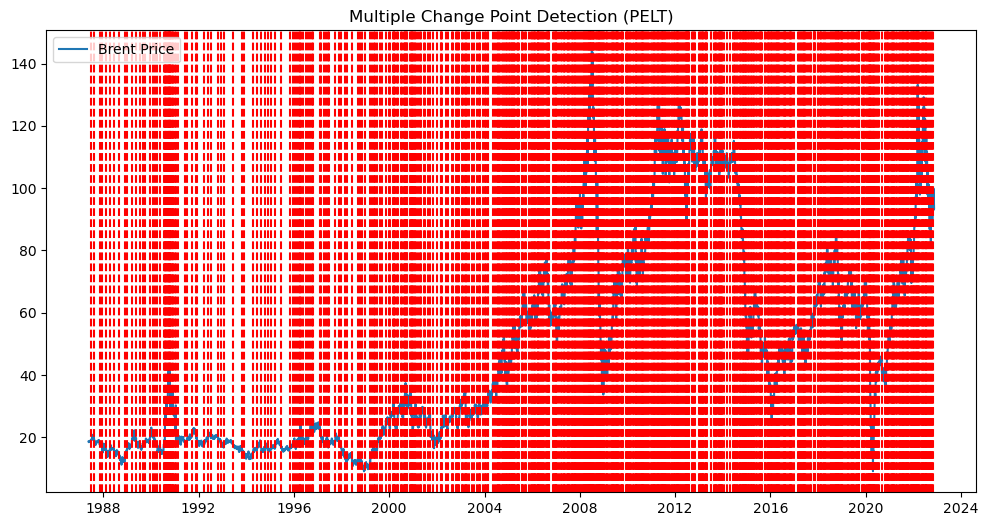

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.index, prices, label="Brent Price")

for date in break_dates:
    plt.axvline(date, color="red", linestyle="--")

plt.title("Multiple Change Point Detection (PELT)")
plt.legend()
plt.show()
